#### Now, we're going to practice creating a script, named ticky_check.py, that generates two different reports from this internal ticketing system log file i.e., syslog.log. This script will create the following reports:
    - The ranking of errors generated by the system: A list of all the error messages logged and how many times each error was found, sorted by the most common error to the least common error. This report doesn't take into account the users involved.
    - The user usage statistics for the service: A list of all users that have used the system, including how many info messages and how many error messages they've generated. This report is sorted by username.
    
    
!! Executing ticky_check.py will generate two report file **__error_message.csv __and user_statistics.csv.**

Keep in mind that:

    The error dictionary should be sorted by the number of errors from most common to least common.
    The user dictionary should be sorted by username.
    
   
**Insert column names as ("Error", "Count") at the zero index position of the sorted error dictionary. And insert column names as ("Username", "INFO", "ERROR") at the zero index position of the sorted per_user dictionary.**

### Output should be like 
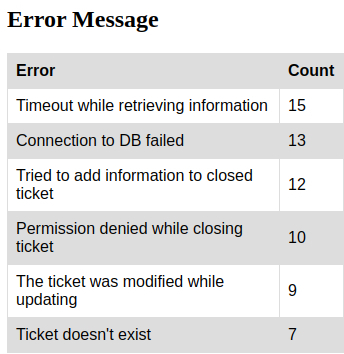
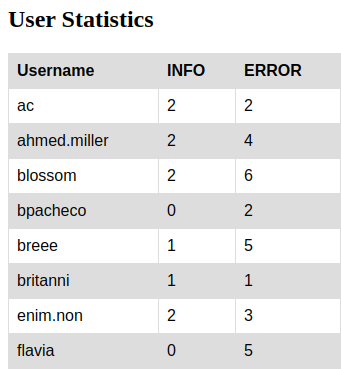

In [48]:
import re
import csv
import operator

from collections import defaultdict

In [2]:
def get_error():
    error_message = {}
    with open('syslog.txt',"r") as logs:
        for l in logs:
            if (re.search(r"ERROR",l)):
                error = re.search(r"(ERROR [\w \[]*) ",l).group(1)[6:]
                
                if error == "Ticket": error = "Ticket doesn't exist"
                    
                if error not in error_message:
                    error_message[error] = 1
                else:
                    error_message[error] += 1
    logs.close()
    
                    
    return sorted(error_message.items(), key=operator.itemgetter(1), reverse=True)

def write_csv():
    file = open("_error_message.csv", "w")
    to_write = get_error()

    writer = csv.writer(file)
    writer.writerow(["Error", "Count"])
    
    for tup in to_write:
            writer.writerow([tup[0], tup[1]])
        
    file.close()

In [3]:
write_csv()

In [103]:
def get_usererror_count():
    user_error_count = {}
    
    with open('syslog.txt',"r") as logs:
        for l in logs:
            if (re.search(r"ERROR",l)):
                user = re.search(r"\(([\w\.]*)", l).group(1)
                if user not in user_error_count:
                    user_error_count[user] = 1
                else:
                    user_error_count[user] += 1 
            else:
                user = re.search(r"\(([\w\.]*)", l).group(1)
                if user not in user_error_count:
                    user_error_count[user] = 0
                
    return user_error_count
    

def get_userinfo_count():
    user_info_count = {}
    
    with open('syslog.txt',"r") as logs:
        for l in logs:
            if (re.search(r"INFO",l)):
                user = re.search(r"\(([\w\.]*)", l).group(1)
                if user not in user_info_count:
                    user_info_count[user] = 1
                else:
                    user_info_count[user] += 1 
            else:
                user = re.search(r"\(([\w\.]*)", l).group(1)
                if user not in user_info_count:
                    user_info_count[user] = 0
                    
    return user_info_count

def merge_user_info():
    d1 = get_userinfo_count()
    d2 = get_usererror_count()
    
    d_final = defaultdict(list)
    
    for d in (d1,d2):
        for key, value in d.items():
            d_final[key].append(value)
            
    return sorted(d_final.items(), key=operator.itemgetter(0))

def write_csv2():
    file = open("user_statistics.csv.", "w")
    to_write = merge_user_info()

    writer = csv.writer(file)
    writer.writerow(["Username","INFO", "ERROR"])
    
    for tup in to_write:
            writer.writerow([tup[0], tup[1][0], tup[1][1]])
        
    file.close()

In [104]:
merge_user_info()

[('ac', [2, 2]),
 ('ahmed.miller', [2, 4]),
 ('blossom', [2, 6]),
 ('bpacheco', [0, 2]),
 ('breee', [1, 5]),
 ('britanni', [1, 1]),
 ('enim.non', [2, 3]),
 ('flavia', [0, 5]),
 ('jackowens', [2, 4]),
 ('kirknixon', [2, 1]),
 ('mai.hendrix', [0, 3]),
 ('mcintosh', [4, 3]),
 ('mdouglas', [2, 3]),
 ('montanap', [0, 4]),
 ('noel', [6, 3]),
 ('nonummy', [2, 3]),
 ('oren', [2, 7]),
 ('rr.robinson', [2, 1]),
 ('sri', [2, 2]),
 ('xlg', [0, 4])]

In [105]:
write_csv2()